<a href="https://colab.research.google.com/github/lauren-esser/capstone-predicting-the-stock-market/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Submission:

**Student Name:** Lauren Esser

**Student Pace:** Full Time

**Scheduled Project Review Date/Time:**  

**Instructor Name:** James Irving

**Blog Post URLS:**  https://lauren-esser.github.io/how_to_use_newsapi and 

#Abstract

An Abstract section that briefly explains your problem, your methodology, and your findings, and business recommendations as a result of your findings. This section should be 1-2 paragraphs long.


#Import

In [1]:
import numpy as np
np.random.seed(1919)

In [2]:
import tensorflow as tf
tf.random.set_seed(1919)

In [3]:
#import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import os, glob
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#connect to google drive
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [5]:
%cd ~
%cd ..

/root
/


In [6]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

archive.zip		      IVE_tickbidask.txt
chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
dogs-vs-cats-sorted.zip       News_Category_Dataset_v2.json


In [7]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['sbin',
 'root',
 'opt',
 'lib',
 'dev',
 'sys',
 'var',
 'lib64',
 'usr',
 'mnt',
 'media',
 'bin',
 'tmp',
 'home',
 'srv',
 'run',
 'proc',
 'boot',
 'etc',
 'gdrive',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'content',
 'lib32']

#Obtain

Obtain Stocks Dataset:
1. Go to http://www.kibot.com/free_historical_data.aspx
2. Scroll to bottom of page and download "Tick with bid/ask data" under IVE(S&P 500 Value Index) 
3. Upload to Google drive
4. Follow below steps

In [8]:
#import and assign txt file
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'IVE_tickbidask.txt', recursive = True)
file = file[0]
file

'/gdrive/My Drive/Colab Notebooks/DataSets/IVE_tickbidask.txt'

In [9]:
#define and view txt file
stocks = pd.read_csv(file, header = None)
stocks.head()

,0,1,2,3,4,5
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [10]:
#rename column headers
stocks = stocks.rename(columns={0: 'Date', 1:'Time', 2: 'Price', 3:'Bid',
                                4: 'Ask', 5:'Size'})
stocks

,Date,Time,Price,Bid,Ask,Size
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100
...,...,...,...,...,...,...
8467941,11/05/2020,16:10:00,116.57,114.01,120.25,0
8467942,11/05/2020,16:25:33,116.35,114.68,118.73,900
8467943,11/05/2020,16:25:33,115.68,114.68,118.73,795
8467944,11/05/2020,18:30:00,116.57,114.54,118.40,0


#### News API: Can only access up to one month of news headlines for free

In [11]:
#pip install newsapi-python

In [12]:
# from newsapi import NewsApiClient

In [135]:
import getpass

In [138]:

# connect with API key
# newsapi = NewsApiClient(api_key = '')

In [137]:
#identify news source options
# news_sources = newsapi.get_sources()
# news_sourcecs_list = []
# for sources in news_sources['sources']:
#   news_sourcecs_list.append(sources['name'])
#   print(sources['name'])

In [15]:
# #test out newsapi.get_everything for specific date
# date = '2020-11-01'
# news_headlines_everything = newsapi.get_everything('&from = (date)', '&to = (date1)', language = 'en')
                                                
# news_titles_everything = []
# for article in news_headlines_everything['articles']:
#   news_titles_everything.append(article['title'])
#   print(article['title'])

In [16]:
# #create empty list
# news_titles = []

# #create function
# def get_news_titles(date):
#   '''Used to get a list of 20 news titles from usatoday on date specified via newsapi.org.

#   Args: date = desired date

#   Returns: List of 20 news articles from the specified date with the date listed after

#   Example: get_news_titles('2020-11-01')'''
  
#   date = date
#   news_headlines_everything = newsapi.get_everything(from_param = (date), to = (date), language = 'en', domains = 'usatoday.com')
#   for article in news_headlines_everything['articles']:
#     news_titles.append([article['title'], date])
#     #print(article['title'])
#     #return news_titles

In [17]:
# get_news_titles('2020-11-01')

In [18]:
# news_titles

In [19]:
# get_news_titles('2020-10-25')
# news_titles

In [20]:
# len(news_titles)

In [21]:
# # sunday_news = ['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02', 
#                '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
#                '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
#                '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
#                '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
#                '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', 
#                '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
#                '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04', 
#                '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01']

In [22]:
# for date in sunday_news:
#   new = get_news_titles(date)
#   news_titles.append(new)
# return news_titles

In [23]:
#newsapi.get_top_headlines for today
# news_headlines = newsapi.get_top_headlines(language = 'en', country = 'us')
# news_titles = []
# for article in news_headlines['articles']:
#   news_titles.append(article['title'])
#   print(article['title'])

#### Obtain News Dataset

News Category Dataset from Kaggle:
1. Go to https://www.kaggle.com/rmisra/news-category-dataset
2. Download dataset to your computer
3. Upload dataset into your Google Drive folder
4. Follow steps below

In [24]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

archive.zip		      IVE_tickbidask.txt
chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
dogs-vs-cats-sorted.zip       News_Category_Dataset_v2.json


In [25]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['sbin',
 'root',
 'opt',
 'lib',
 'dev',
 'sys',
 'var',
 'lib64',
 'usr',
 'mnt',
 'media',
 'bin',
 'tmp',
 'home',
 'srv',
 'run',
 'proc',
 'boot',
 'etc',
 'gdrive',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'content',
 'lib32']

In [26]:
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'archive.zip', recursive = True)
file = file[0]
file

'/gdrive/My Drive/Colab Notebooks/DataSets/archive.zip'

In [27]:
#upzip data
zip_path = file
!cp '{zip_path}' .

!unzip -q archive.zip
!rm archive.zip

In [28]:
#open file for viewing
news = pd.read_json('/gdrive/My Drive/Colab Notebooks/DataSets/News_Category_Dataset_v2.json', lines = True)

In [29]:
news.head(20)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,Ron Dicker,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right.",2018-05-26
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,2018-05-26
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",2018-05-26
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...,2018-05-26


#Scrub

### Scrubbing Stocks

In [30]:
#check nulls
stocks.isna().sum()

Date     0
Time     0
Price    0
Bid      0
Ask      0
Size     0
dtype: int64

In [31]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467946 entries, 0 to 8467945
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Time    object 
 2   Price   float64
 3   Bid     float64
 4   Ask     float64
 5   Size    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 387.6+ MB


In [32]:
#convert date to a datetime column
stocks['Date'] = pd.to_datetime(stocks['Date'])#, format = '%d/%m/%y')

In [33]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467946 entries, 0 to 8467945
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Time    object        
 2   Price   float64       
 3   Bid     float64       
 4   Ask     float64       
 5   Size    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 387.6+ MB


In [34]:
#set date to index
stocks.set_index('Date', inplace= True)

In [35]:
stocks.index

DatetimeIndex(['2009-09-28', '2009-09-28', '2009-09-28', '2009-09-28',
               '2009-09-28', '2009-09-28', '2009-09-28', '2009-09-28',
               '2009-09-28', '2009-09-28',
               ...
               '2020-11-05', '2020-11-05', '2020-11-05', '2020-11-05',
               '2020-11-05', '2020-11-05', '2020-11-05', '2020-11-05',
               '2020-11-05', '2020-11-05'],
              dtype='datetime64[ns]', name='Date', length=8467946, freq=None)

In [36]:
stocks.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2009-09-28,09:30:00,50.79,50.70,50.79,100
2009-09-28,09:30:00,50.71,50.70,50.79,638
2009-09-28,09:31:32,50.75,50.75,50.76,100
2009-09-28,09:31:32,50.75,50.75,50.76,100
2009-09-28,09:31:33,50.75,50.75,50.76,100


In [37]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8467946 entries, 2009-09-28 to 2020-11-05
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Time    object 
 1   Price   float64
 2   Bid     float64
 3   Ask     float64
 4   Size    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 387.6+ MB


### Scrubbing News

In [38]:
news.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [39]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [40]:
news.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [41]:
news.nunique()

category                 41
headline             199344
authors               27993
link                 200812
short_description    178353
date                   2309
dtype: int64

In [42]:
#check diff categories
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [43]:
#end date
news.date.max()

Timestamp('2018-05-26 00:00:00')

In [44]:
#start date
news.date.min()

Timestamp('2012-01-28 00:00:00')

In [45]:
news.set_index('date', inplace= True)

In [95]:
news.head(20)

,category,headline,authors,link,short_description,year
date,,,,,,
2018-05-26,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018
2018-05-26,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018
2018-05-26,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018
2018-05-26,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018
2018-05-26,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018
2018-05-26,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018
2018-05-26,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,Ron Dicker,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right.",2018
2018-05-26,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,2018
2018-05-26,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",2018


In [105]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [106]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [107]:
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)

In [132]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

for headline in news.headline:
  tokens = nltk.regexp_tokenize(headline, pattern)
  stopped_tokens = [w.lower() for w in tokens if w not in stopwords]

In [125]:
from nltk import FreqDist

In [134]:
freqdist = FreqDist(stopped_tokens)
most_common = freqdist.most_common(200)
most_common

[('dwight', 1),
 ('howard', 1),
 ('rips', 1),
 ('teammates', 1),
 ('after', 1),
 ('magic', 1),
 ('loss', 1),
 ('to', 1),
 ('hornets', 1)]

In [102]:
news.head()

,category,headline,authors,link,short_description,year
date,,,,,,
2018-05-26,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018
2018-05-26,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018
2018-05-26,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018
2018-05-26,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018
2018-05-26,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018


#Explore

### Stocks Exploration

In order to make sure we are looking at the same time frame for both stocks and news articles, I will slice and save the correct dates for stocks to correspond to the news articles: 2012-01-28 to 2018-05-26.


In [47]:
stocks_news = stocks['2012-01-28': '2018-05-26']
stocks_news.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2012-01-30,09:08:30,61.00,60.16,60.61,2119
2012-01-30,09:30:00,60.37,60.37,60.45,159
2012-01-30,09:30:00,60.38,60.38,60.43,100
2012-01-30,09:30:06,60.36,60.31,60.42,400
2012-01-30,09:30:17,60.30,60.29,60.39,150


I want to look at weekly mean of stocks for comparison during my Exploration.

In [48]:
#downsampling to weekly price if needed
price_weekly = stocks_news['Price'].resample('W')
weekly_mean = price_weekly.mean()
weekly_mean.head()

Date
2012-02-05    61.231669
2012-02-12    62.488521
2012-02-19    62.603400
2012-02-26    63.227857
2012-03-04    63.464155
Freq: W-SUN, Name: Price, dtype: float64

In [49]:
weekly_mean.isna().sum()

0

###### Line Plot

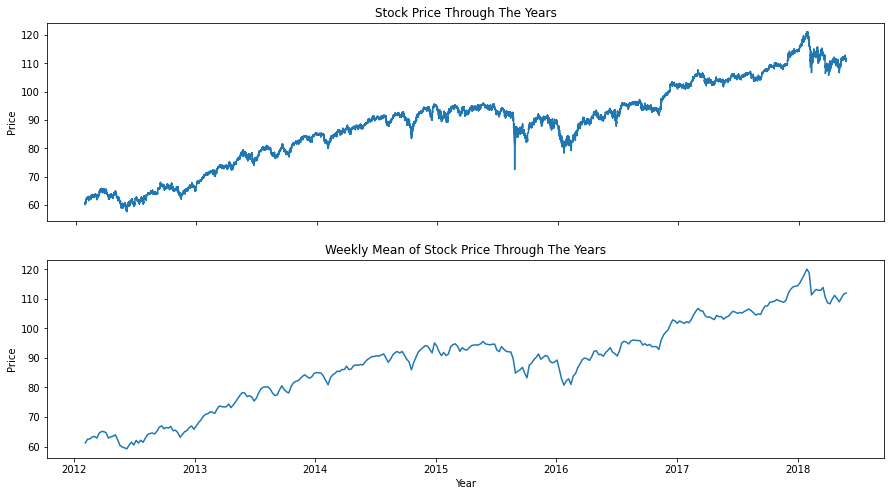

In [50]:
#line plot of stocks price over the years
fig, (ax, ax1) = plt.subplots(2, figsize = (15, 8))
ax.plot(stocks_news['Price'])
ax.set_title('Stock Price Through The Years')
ax.set_ylabel('Price')
ax.set_xlabel('Year')

#weekly lineplot 
ax1.plot(weekly_mean)
ax1.set_title('Weekly Mean of Stock Price Through The Years')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')

#label outer to see 2nd title
ax.label_outer()

---

###### Dot Plot

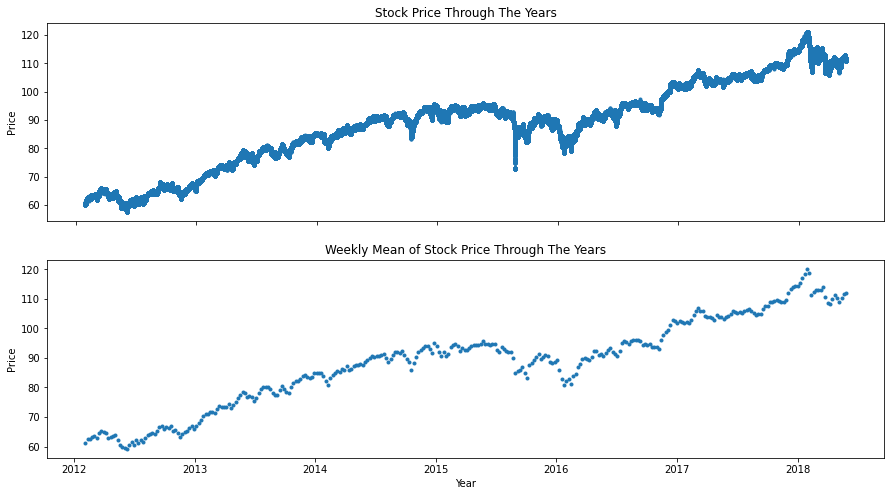

In [51]:
#dot plot of stocks price over the years
fig, (ax, ax1) = plt.subplots(2, figsize = (15, 8))
ax.plot(stocks_news['Price'], '.')
ax.set_title('Stock Price Through The Years')
ax.set_ylabel('Price')
ax.set_xlabel('Year')

#weekly dot plot 
ax1.plot(weekly_mean, '.')
ax1.set_title('Weekly Mean of Stock Price Through The Years')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')

#label outer to see 2nd title
ax.label_outer()

---

###### Rolling Statistics

In [52]:
roll_mean = stocks_news['Price'].rolling(window = 8, center = False).mean()
roll_std = stocks_news['Price'].rolling(window = 8, center = False).std()

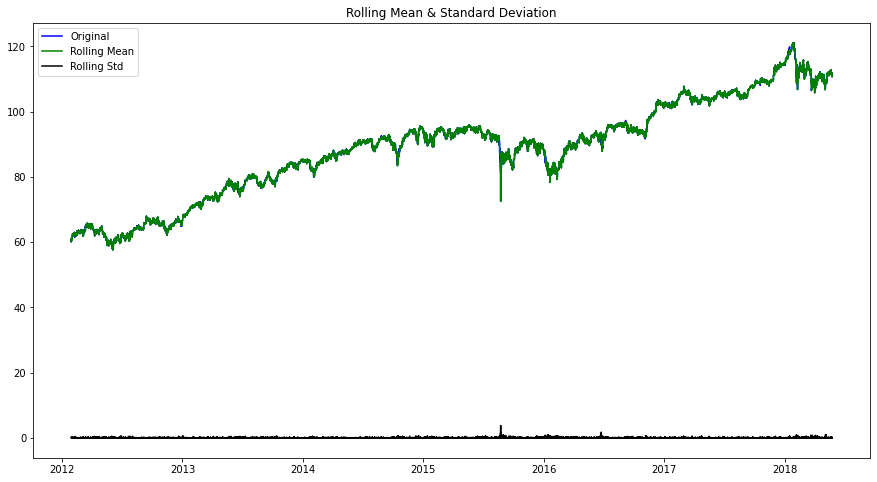

In [53]:
fig = plt.figure(figsize = (15, 8))
plt.plot(stocks_news['Price'], color = 'blue', label = 'Original')
plt.plot(roll_mean, color = 'green', label = 'Rolling Mean')
plt.plot(roll_std, color = 'black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

---

###### The Dickey-Fuller Test

In [54]:
dftest = adfuller(weekly_mean)

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used',
                                           'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Values (%s)' %key] = value
print(dftest)

(-1.013652453608182, 0.7482523707955607, 2, 327, {'1%': -3.45050711373316, '5%': -2.8704195794076743, '10%': -2.571500856923753}, 998.5184293821985)


In [55]:
print('Results of Dicky-Fuller test: \n')

print(dfoutput)

Results of Dicky-Fuller test: 

Test Statistic                  -1.013652
p-value                          0.748252
#Lags Used                       2.000000
Number of Observations Used    327.000000
Critical Values (1%)            -3.450507
Critical Values (5%)            -2.870420
Critical Values (10%)           -2.571501
dtype: float64


**Summary:**
- Not a stationary series
- Linear upward trend
- Big drop near the end of 2015.


---

###### Grouping and Visualizing Time Series

In [56]:
stocks_news.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2012-01-30,09:08:30,61.00,60.16,60.61,2119
2012-01-30,09:30:00,60.37,60.37,60.45,159
2012-01-30,09:30:00,60.38,60.38,60.43,100
2012-01-30,09:30:06,60.36,60.31,60.42,400
2012-01-30,09:30:17,60.30,60.29,60.39,150


In [57]:
stocks_news.index

DatetimeIndex(['2012-01-30', '2012-01-30', '2012-01-30', '2012-01-30',
               '2012-01-30', '2012-01-30', '2012-01-30', '2012-01-30',
               '2012-01-30', '2012-01-30',
               ...
               '2018-05-25', '2018-05-25', '2018-05-25', '2018-05-25',
               '2018-05-25', '2018-05-25', '2018-05-25', '2018-05-25',
               '2018-05-25', '2018-05-25'],
              dtype='datetime64[ns]', name='Date', length=4563891, freq=None)

James suggestion in class: kinda confused, may need to wait for one on one.

In [58]:
#group values annually
year_groups = stocks_news.groupby(pd.Grouper(freq = 'A'))

In [59]:
# #add year column for ease of use
# stocks_news['year'] = stocks_news.index.to_series().apply(lambda x: x.year)

# #check column
# stocks_news.head()

In [60]:
# #create new dataframe to store yearly values
# stocks_annual = pd.DataFrame()

# for yr, group in year_groups:
#   stocks_annual[yr.year] = group.values.ravel()

# #plot yearly subplots
# stocks_annual.plot(figsize=(15, 8), subplots = True, legend = True);
# plt.show()

In [61]:
# year_groups.keys()

In [62]:
#plot all years on same graph
# stocks_annual.plot(figsize - (15,8), subplots = False, legend = True)
# plt.show()

###### Histograms

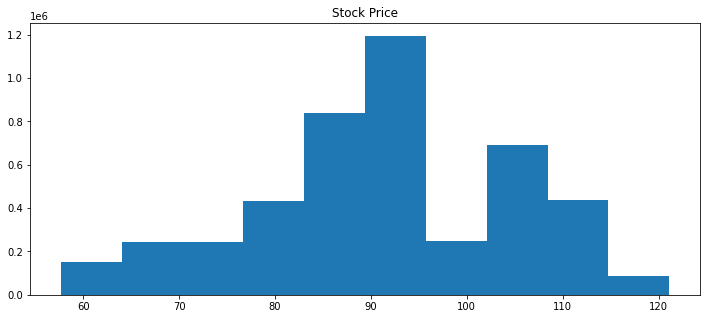

In [63]:
#build histogram to check distribution
fig, ax = plt.subplots(figsize = (12, 5))
ax.hist(stocks_news['Price'])
ax.set_title('Stock Price')
plt.show()

###### Density Plot

Text(0.5, 1.0, 'Density Plot of Stock Price')

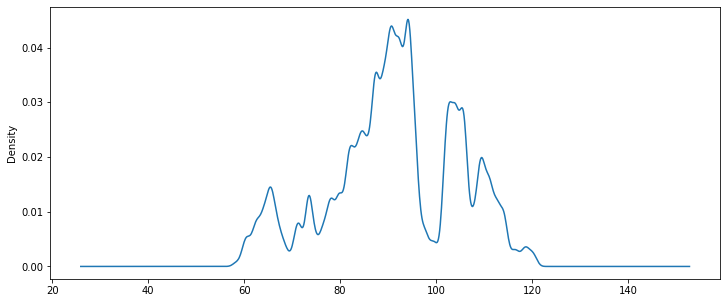

In [64]:
#build density plot to check distribution
stocks_news['Price'].plot(kind = 'kde', figsize = (12, 5));
ax.set_title('Density Plot of Stock Price')

###### Time Series Box and Whisker Plots by Year

In [65]:
#build box and whiskers plot by year
#stocks_annual.boxplot(figsize = (12, 5));

###### Time Series Heat Map

In [66]:
#year_matrix = stocks_annual.T
#plt.matshow(year_matrix, interpolation = None, aspect = 'auto');

#### Eliminating the trend

##### Square Root Transform

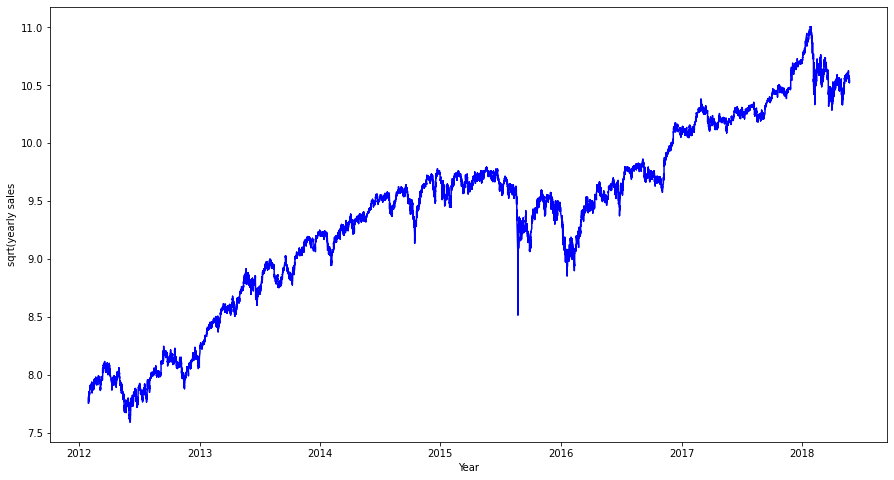

In [67]:
data = pd.Series(np.sqrt(stocks_news['Price']))
fig = plt.figure(figsize = (15, 8))
plt.plot(data, color = 'blue')
plt.xlabel('Year')
plt.ylabel('sqrt(yearly sales')
plt.show()

##### Log Transformation

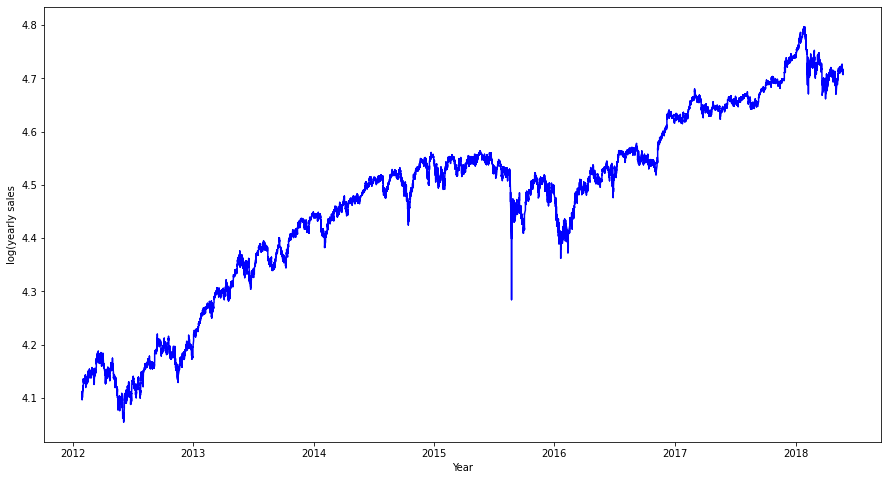

In [68]:
data = pd.Series(np.log(stocks_news['Price']))
fig = plt.figure(figsize = (15, 8))
plt.plot(data, color = 'blue')
plt.xlabel('Year')
plt.ylabel('log(yearly sales')
plt.show()

##### Differencing


In [69]:
data_diff = data.diff(periods = 1)
data_diff.head()

Date
2012-01-30         NaN
2012-01-30   -0.010382
2012-01-30    0.000166
2012-01-30   -0.000331
2012-01-30   -0.000995
Name: Price, dtype: float64

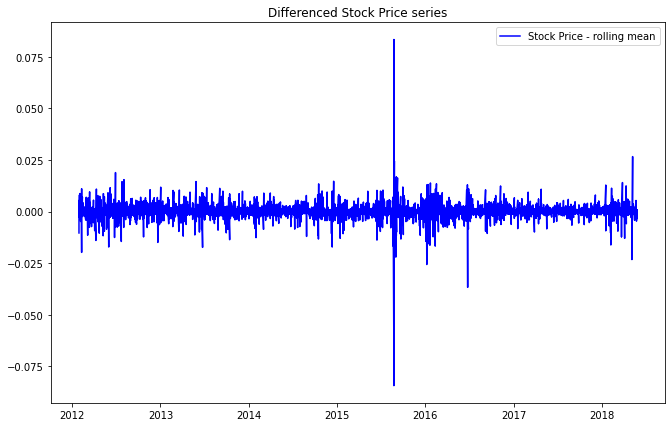

In [70]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Stock Price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Stock Price series')
plt.show(block=False)

In [71]:
data_diff = data.diff().dropna()
data_diff.head()

Date
2012-01-30   -0.010382
2012-01-30    0.000166
2012-01-30   -0.000331
2012-01-30   -0.000995
2012-01-30   -0.000498
Name: Price, dtype: float64

In [72]:
# data_diff = data_diff.groupby(pd.Grouper(freq = 'A'))
# data_diff.head()

### News Exploration

<Figure size 1080x576 with 0 Axes>

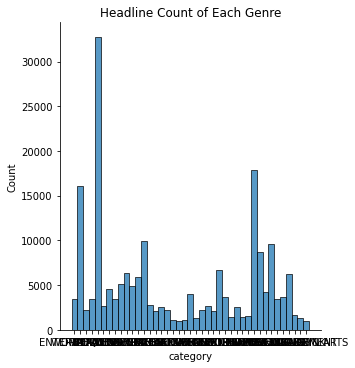

In [73]:
fig = plt.figure(figsize = (15, 8))
sns.displot(news.category)
plt.title('Headline Count of Each Genre');

In [74]:
news['year'] = news.index.to_series().apply(lambda x: x.year)

In [75]:
news.head()

,category,headline,authors,link,short_description,year
date,,,,,,
2018-05-26,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018
2018-05-26,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018
2018-05-26,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018
2018-05-26,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018
2018-05-26,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018


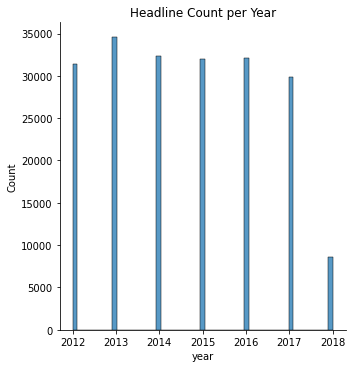

In [76]:
sns.displot(news.year)
plt.title('Headline Count per Year');

#Model

#### Stocks Basic Time Series Model

##### Random Walk Model
- no specified mean or variance
- a strong dependence over time

In [77]:
#series with the specified dates
work = pd.date_range('2012-01-28', '2018-05-26', freq = 'D')

#white noise error 
error = np.random.normal(0, 10, len(work))

#random walk
def random_walk(start, error):
  Y_0 = start
  cum_error = np.cumsum(error)
  Y = cum_error + Y_0
  return Y

#value of share on first date
share_value = random_walk(61, error)

shares_series = pd.Series(share_value, index = work)

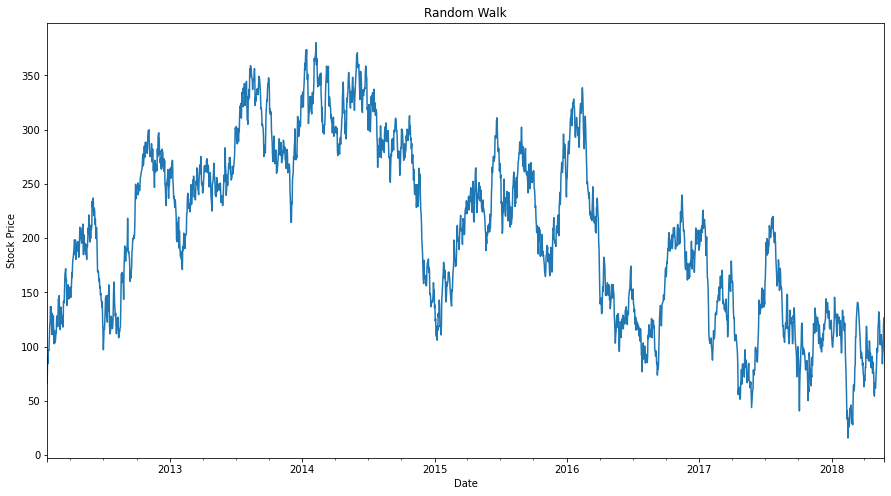

In [78]:
ax = shares_series.plot(figsize = (15, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Random Walk')
plt.show()

##### Random Walk with a Drift

In [79]:
#series with the specified dates
work = pd.date_range('2012-01-28', '2018-05-26', freq = 'D')

#white noise error 
error = np.random.normal(0, 10, len(work))

#random walk
def random_walk(start, error):
  Y_0 = start
  #add drift of 8
  cum_error = np.cumsum(error + 8)
  Y = cum_error + Y_0
  return Y

#value of share on first date
share_value_drift = random_walk(61, error)

shares_series_diff = pd.Series(share_value_drift, index = work)

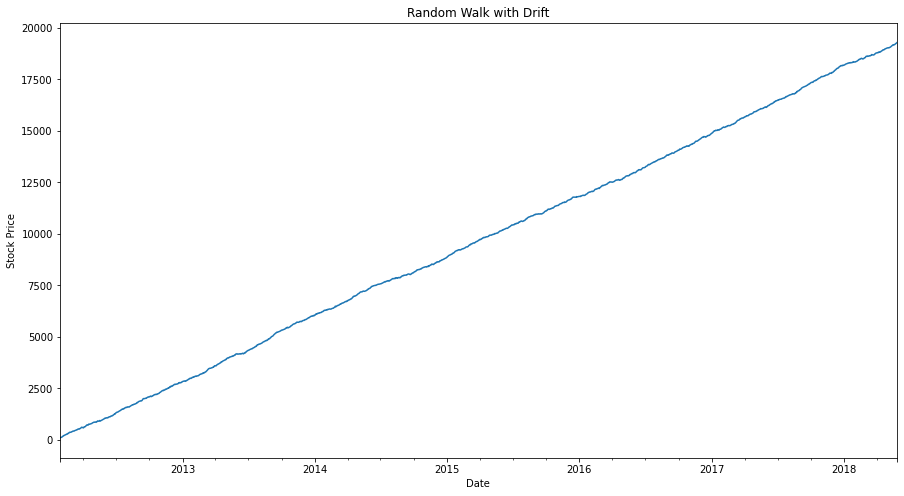

In [80]:
ax = shares_series_diff.plot(figsize = (15, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Random Walk with Drift')
plt.show()

##### Differencing in a Random Walk Model

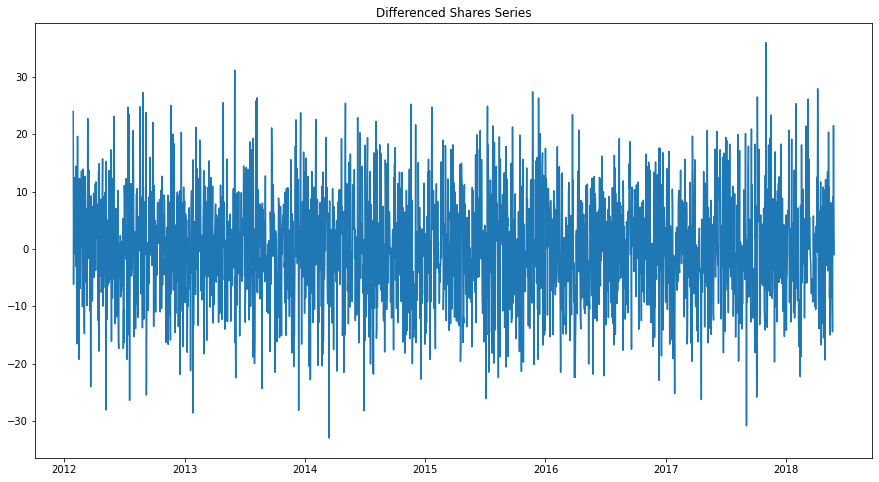

In [81]:
#no drift
shares_diff = shares_series.diff(periods = 1)

fig = plt.figure(figsize = (15, 8))
plt.plot(shares_diff)
plt.title('Differenced Shares Series')
plt.show()

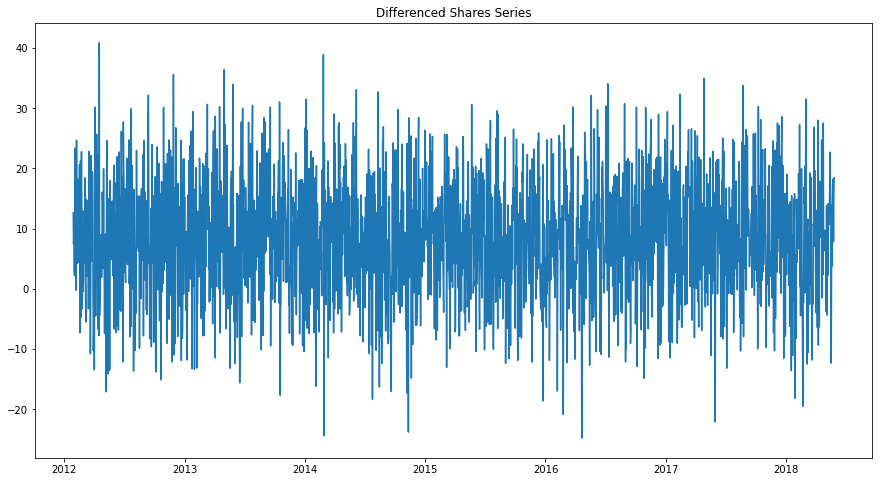

In [82]:
#drift
shares_drift_diff = shares_series_diff.diff(periods = 1)

fig = plt.figure(figsize = (15, 8))
plt.plot(shares_drift_diff)
plt.title('Differenced Shares Series')
plt.show()

###### ARMA Model 

In [83]:
stocks_news.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2012-01-30,09:08:30,61.00,60.16,60.61,2119
2012-01-30,09:30:00,60.37,60.37,60.45,159
2012-01-30,09:30:00,60.38,60.38,60.43,100
2012-01-30,09:30:06,60.36,60.31,60.42,400
2012-01-30,09:30:17,60.30,60.29,60.39,150


In [84]:
data_diff.head()

Date
2012-01-30   -0.010382
2012-01-30    0.000166
2012-01-30   -0.000331
2012-01-30   -0.000995
2012-01-30   -0.000498
Name: Price, dtype: float64

In [85]:
# stocks_news2 = stocks_news.copy()

In [86]:
# #plotting the ACF
# from statsmodels.graphics.tsaplots import plot_acf
# fig, ax = plt.subplots(figsize = (8, 3))
# plot_acf(data_diff, ax = ax, lags = 8)

In [87]:
# #plotting PACF
# from statsmodels.graphics.tsaplots import plot_pacf
# fig, ax = plt.subplots(figsize= (8, 3))
# plot_pacf(data_diff, ax = ax, lags = 8);

In [88]:
# #import arma
# from statsmodels.tsa.arima_model import ARMA

# #fit an ARMA model
# mod_arma = ARMA(data_diff, order = (HOW DO I SELECT ORDER? CLASS HAS (1,0))
# res_arma = mod_arma.fit()

# print(res_arma.summary())

After figuring out ARMA model then try diff orders to select the best. Select it based on AIC or. BIC as model selection criterion.

#### ARIMA Model

q - auto regressive part of the model. effect of past values into model. 
d - amount of differnecing as it identifies the number of lag values to subtract from the current observation
q - moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past.

In [89]:
stocks_news2 = stocks_news.copy()
stocks_news2.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2012-01-30,09:08:30,61.00,60.16,60.61,2119
2012-01-30,09:30:00,60.37,60.37,60.45,159
2012-01-30,09:30:00,60.38,60.38,60.43,100
2012-01-30,09:30:06,60.36,60.31,60.42,400
2012-01-30,09:30:17,60.30,60.29,60.39,150


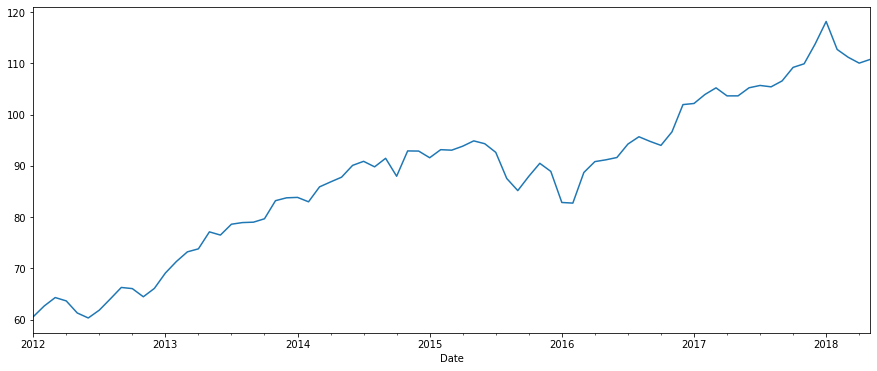

Date
2012-01-01    60.561473
2012-02-01    62.663006
2012-03-01    64.308922
2012-04-01    63.655784
2012-05-01    61.302074
Freq: MS, Name: Price, dtype: float64


In [90]:
# The 'MS' string groups the data in buckets by start of the month
stocks_news2 = stocks_news2['Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
stocks_news2 = stocks_news2.fillna(stocks_news2.bfill())

# Plot the time series
stocks_news2.plot(figsize=(15, 6))
plt.show()
print(stocks_news2.head())

In [91]:
import itertools

In [92]:
#define p,d,q with value between 0 & 2
p = d = q = range(0, 2)

#generate diff combos of p, q, & d triplets
pdq = list(itertools.product(p, d, q))

#generate all diff combos of seasonal p, d, q, triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Try to find the model with the lowest AIC score

In [93]:
#initialize empty list
answer = []

#iterate through params
for comb in pdq:
  for combs in pdqs:
    try:
      mod = sm.tsa.statespace.ARIMAX(stocks_news2,
                                      order = comb,
                                      seasonal_order = combs,
                                      enforce_stationarity = False,
                                      enforce_invertibility = False)
      
      output = mod.fit()
      answer.append([comb, combs, output.aic])
      print('ARIMA{} x{}12: AIC Calculated = {}'.format(comb, combs, output.aic))
    except:
      continue

In [94]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(answer, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

TypeError: ignored

#Interpret

#Summary

#Future Work